In [56]:
import numpy as np
import pandas as pd
import glob
import os
from tqdm.notebook import tqdm
tqdm.pandas()

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

In [57]:
def get_df_info(df):
    print('Dataframe shape: ', df.shape)
    print('-----'*20)
    print('Dataframe info: ')
    print(df.info())
    print('-----'*20)
    print('Dataframe null values count:')
    print(df.isna().sum())
    print('-----'*20)
    print('Dataframe duplicates count:')
    print(df.duplicated().sum())
    print('-----'*20)
    print('Dataframe sample: ')
    display(df.sample(10))


## Data preprocessing

### Read tweets file with sentiments

In [58]:
tweets_df = pd.read_csv('./dataset/Tweets/tweets-sentiment-roberta.csv', parse_dates = ['date'])
get_df_info(tweets_df)

Dataframe shape:  (249025, 5)
----------------------------------------------------------------------------------------------------
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249025 entries, 0 to 249024
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   stock    249025 non-null  object        
 1   date     249025 non-null  datetime64[ns]
 2   tweets   249025 non-null  object        
 3   bearish  249025 non-null  float64       
 4   bullish  249025 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 9.5+ MB
None
----------------------------------------------------------------------------------------------------
Dataframe null values count:
stock      0
date       0
tweets     0
bearish    0
bullish    0
dtype: int64
----------------------------------------------------------------------------------------------------
Dataframe duplicates count:
0
-----

,stock,date,tweets,bearish,bullish
135403,GOOGL,2019-08-21,"Ive started playing with Google Lens lately, a...",0.001386,0.998614
78612,DIS,2019-10-22,"You have a valid point.\nI would argue though,...",0.001385,0.998616
87582,DIS,2020-03-24,🌡️ S&P 500 HeatMap\n\n$SPX $SPY #Stocks #Tradi...,0.001567,0.998433
189933,NFLX,2019-07-20,"$NFLX Top Research Reports for Abbott, Netflix...",0.001387,0.998613
172413,MSFT,2019-09-17,#TuesdayMotivation \nHere is a #watchlist of t...,0.001544,0.998456
178869,MSFT,2020-01-06,Some media and tech companies like $WWE $CBS $...,0.683816,0.316184
55000,APRN,2020-04-09,Best meal kit for calorie counting: Blue Apron...,0.049696,0.950304
96189,FB,2019-08-30,.@Twitter CEO Jack Dorsey’s account has been h...,0.915603,0.084397
190373,NFLX,2019-07-27,I am amazed by $NFLX. What an awesome story — ...,0.006165,0.993835
189719,NFLX,2019-07-16,$AA $EBAY $IBM $KMI $NFLX\n\n Notable earnings...,0.010452,0.989548


In [59]:
tweets_df.duplicated().sum()

0

### Read stock files with prices

In [60]:
stocks_df = pd.read_csv('./dataset/Stocks/stocks.csv', parse_dates=['date'])
get_df_info(stocks_df)

Dataframe shape:  (3763, 8)
----------------------------------------------------------------------------------------------------
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3763 entries, 0 to 3762
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3763 non-null   datetime64[ns]
 1   open       3763 non-null   float64       
 2   high       3763 non-null   float64       
 3   low        3763 non-null   float64       
 4   close      3763 non-null   float64       
 5   adj_close  3763 non-null   float64       
 6   volume     3763 non-null   int64         
 7   stock      3763 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 235.3+ KB
None
----------------------------------------------------------------------------------------------------
Dataframe null values count:
date         0
open         0
high         0
low          0


,date,open,high,low,close,adj_close,volume,stock
1256,2019-07-17,144.600006,144.679993,142.369995,142.570007,141.720917,5296400,DIS
1344,2019-11-19,148.179993,149.479996,146.800003,148.380005,147.496323,11504300,DIS
1432,2020-03-27,100.449997,101.489998,95.540001,96.400002,96.400002,30591500,DIS
3561,2019-09-25,224.559998,228.979996,218.360001,228.699997,228.699997,9427100,TSLA
892,2020-02-03,3.970000,4.090000,3.780000,3.820000,3.820000,255100,APRN
3401,2020-02-05,88.879997,89.199997,86.629997,87.559998,87.067955,9982700,SBUX
2913,2020-02-26,169.710007,173.259995,168.210007,170.169998,169.697372,56206100,MSFT
3471,2020-05-15,72.809998,74.639999,72.669998,74.160004,74.160004,9489100,SBUX
628,2020-01-14,1885.880005,1887.109985,1858.550049,1869.439941,1869.439941,3440900,AMZN
3026,2019-08-08,311.029999,316.359985,306.630005,315.899994,315.899994,5905900,NFLX


### Merge tweets and stocks dataframes

In [61]:
df = pd.merge(tweets_df, stocks_df, how='inner', on=['date', 'stock'])
get_df_info(df)

Dataframe shape:  (180360, 11)
----------------------------------------------------------------------------------------------------
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180360 entries, 0 to 180359
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   stock      180360 non-null  object        
 1   date       180360 non-null  datetime64[ns]
 2   tweets     180360 non-null  object        
 3   bearish    180360 non-null  float64       
 4   bullish    180360 non-null  float64       
 5   open       180360 non-null  float64       
 6   high       180360 non-null  float64       
 7   low        180360 non-null  float64       
 8   close      180360 non-null  float64       
 9   adj_close  180360 non-null  float64       
 10  volume     180360 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 16.5+ MB
None
-----------------------------

,stock,date,tweets,bearish,bullish,open,high,low,close,adj_close,volume
103084,GOOGL,2019-12-27,Around 50 $SPX #stocks put in new 52 week high...,0.038721,0.961279,1364.000000,1367.050049,1353.000000,1354.640015,1354.640015,1160600
96719,GOOGL,2019-07-22,Looks like Carter Worth just cosigned exactly ...,0.005374,0.994626,1135.469971,1140.020020,1125.209961,1139.209961,1139.209961,1445700
36415,APRN,2020-01-03,"Like Blue Apron, but for volunteering",0.230328,0.769672,6.270000,6.350000,6.147000,6.160000,6.160000,248000
48502,C,2020-02-27,Oversold: $T $HD $DIS $BSX $EQIX $C $LMT $PNC ...,0.001726,0.998273,66.099998,66.889999,64.400002,64.449997,63.773113,34651400
51395,C,2020-05-13,Why does Trump want lower (even negative) inte...,0.833098,0.166902,42.000000,42.200001,40.230000,40.599998,40.599998,35350600
159126,SBUX,2020-01-24,$TER Raised to $90 at Citi\n$AAPL Raised to $4...,0.001573,0.998427,94.000000,94.129997,91.339996,92.029999,91.088303,7815500
85484,GE,2019-10-01,RECAP 10/1 Chatter:\n$MNST - $KO Energy Drink\...,0.001398,0.998602,8.960000,9.040000,8.510000,8.610000,8.580801,68778600
140696,NFLX,2019-09-24,$NFLX breaking down from weekly support trendl...,0.986662,0.013338,262.500000,265.000000,252.279999,254.589996,254.589996,16338200
129002,MSFT,2019-12-02,#estate asset watch - large cap trading volume...,0.001775,0.998225,151.809998,151.830002,148.320007,149.550003,148.728424,27418400
85430,GE,2019-09-30,Why This General Electric News Is Huge for CEO...,0.001428,0.998571,9.080000,9.100000,8.940000,8.940000,8.909682,35091400


In [62]:
df = df.set_index('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180360 entries, 2019-07-15 to 2020-07-08
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   stock      180360 non-null  object 
 1   tweets     180360 non-null  object 
 2   bearish    180360 non-null  float64
 3   bullish    180360 non-null  float64
 4   open       180360 non-null  float64
 5   high       180360 non-null  float64
 6   low        180360 non-null  float64
 7   close      180360 non-null  float64
 8   adj_close  180360 non-null  float64
 9   volume     180360 non-null  int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 15.1+ MB


In [63]:
df.head()

,stock,tweets,bearish,bullish,open,high,low,close,adj_close,volume
date,,,,,,,,,,
2019-07-15,AAPL,Top 5 Apple Prime Day deals http://dlvr.it/R8...,0.001388,0.998612,204.089996,205.869995,204.0,205.210007,202.78981,16947400
2019-07-15,AAPL,CCI Buy Signals : $AAPL $GDXJ $GH $ZS $JNUG,0.001409,0.998591,204.089996,205.869995,204.0,205.210007,202.78981,16947400
2019-07-15,AAPL,Traders checkout these trade plans given over ...,0.001429,0.998571,204.089996,205.869995,204.0,205.210007,202.78981,16947400
2019-07-15,AAPL,272 stocks \nMoved Above Upper Price Channel...,0.001382,0.998618,204.089996,205.869995,204.0,205.210007,202.78981,16947400
2019-07-15,AAPL,Watch what happened at 3:23 in @NaviAvatar1's ...,0.001471,0.998529,204.089996,205.869995,204.0,205.210007,202.78981,16947400


## Exploratory data analysis

### Dates range of dataframe

In [64]:
print(str(df.index.min()) + ' ' +  str(df.index.max()))

2019-07-15 00:00:00 2020-07-09 00:00:00


### Adding a sentiment column to the dataframe

In [65]:
df['sentiment'] = df[['bearish', 'bullish']].idxmax(axis = 1)
df.head()

,stock,tweets,bearish,bullish,open,high,low,close,adj_close,volume,sentiment
date,,,,,,,,,,,
2019-07-15,AAPL,Top 5 Apple Prime Day deals http://dlvr.it/R8...,0.001388,0.998612,204.089996,205.869995,204.0,205.210007,202.78981,16947400,bullish
2019-07-15,AAPL,CCI Buy Signals : $AAPL $GDXJ $GH $ZS $JNUG,0.001409,0.998591,204.089996,205.869995,204.0,205.210007,202.78981,16947400,bullish
2019-07-15,AAPL,Traders checkout these trade plans given over ...,0.001429,0.998571,204.089996,205.869995,204.0,205.210007,202.78981,16947400,bullish
2019-07-15,AAPL,272 stocks \nMoved Above Upper Price Channel...,0.001382,0.998618,204.089996,205.869995,204.0,205.210007,202.78981,16947400,bullish
2019-07-15,AAPL,Watch what happened at 3:23 in @NaviAvatar1's ...,0.001471,0.998529,204.089996,205.869995,204.0,205.210007,202.78981,16947400,bullish


### Distribuition of tweet sentiments

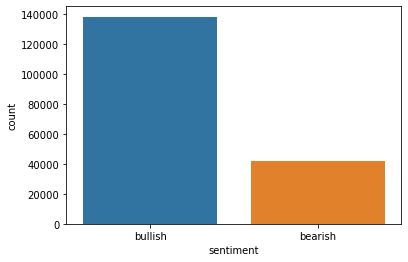

In [66]:
sns.countplot(data = df, x = 'sentiment')
plt.show()

### Top 5 companies based on overall tweet counts

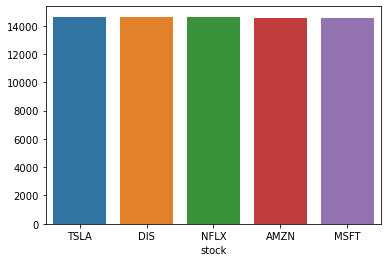

In [67]:
top5 = df.groupby(['stock'])['tweets'].count().sort_values(ascending= False).nlargest(5)
# display(top5)
sns.barplot(x = top5.index, y = top5.values)
plt.show()

top5_companies = top5.axes[0]

### Count of tweets per month for top 5 companies

In [68]:
top5_df = df[df['stock'].isin(top5_companies)]

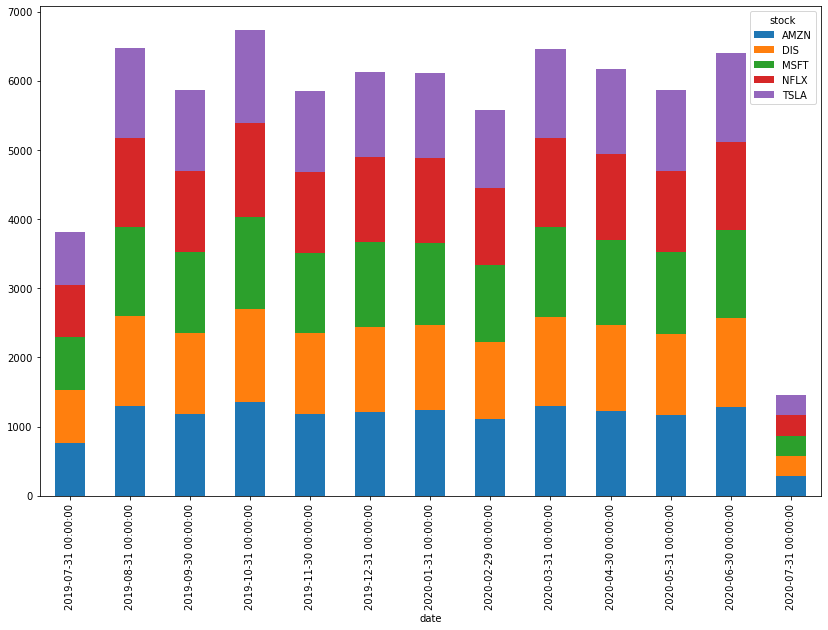

In [69]:
fig, axs = plt.subplots(1,1,figsize=(14,9))
top5_df.groupby([pd.Grouper(freq='M'), 'stock'])['tweets'].count().unstack().plot(kind = 'bar', stacked = True, ax=axs)
plt.show()

#### Length distribuition of tweets

In [70]:
df['tweet_length'] = df['tweets'].apply(lambda tweet: len(tweet.split()))
tweet_length_mean = np.mean(df['tweet_length'])
print('Mean length of tweets: ' + str(tweet_length_mean))
df.sample(5)

Mean length of tweets: 26.461576846307384


,stock,tweets,bearish,bullish,open,high,low,close,adj_close,volume,sentiment,tweet_length
date,,,,,,,,,,,,
2019-10-17,C,Grow your wealth with @ProfectuSystems trading...,0.001394,0.998606,70.029999,70.339996,69.180000,69.599998,67.929863,11382800,bullish,22
2019-11-25,FB,"I have given up on #Facebook , its a total was...",0.993537,0.006462,199.520004,200.970001,199.250000,199.789993,199.789993,15272300,bearish,37
2019-09-27,FB,CONGRATS! @tukrisda on your 1st day in the tra...,0.001482,0.998518,180.490005,180.759995,175.660004,177.100006,177.100006,14656200,bullish,52
2020-01-28,AAPL,Come on and up that you cheap bishes. https:/...,0.001712,0.998288,312.600006,318.399994,312.190002,317.690002,316.082184,40558500,bullish,11
2020-07-08,FB,BGI Flying in afterhours 🚀🚀🚀\n\nMONSTER EARNIN...,0.001388,0.998612,238.110001,246.990005,236.589996,243.580002,243.580002,29791300,bullish,33


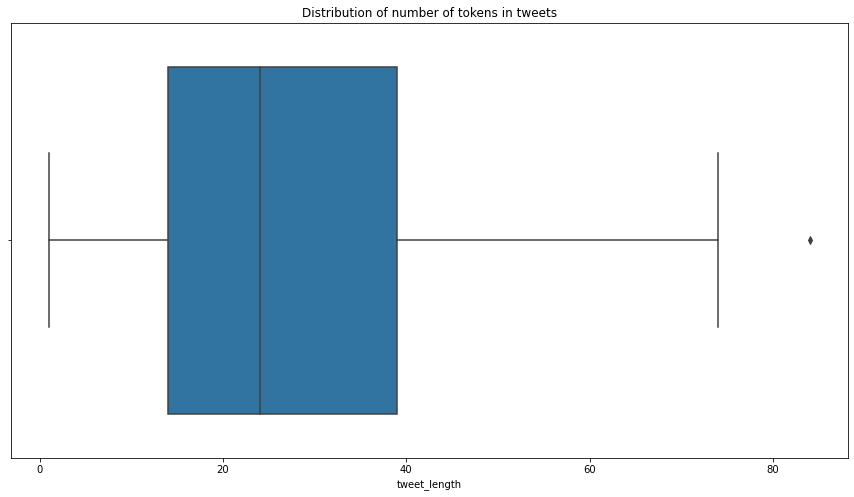

In [71]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
axes.set_title('Distribution of number of tokens in tweets')
sns.boxplot(x = df['tweet_length'], ax=axes)
# sns.histplot(x = df['tweet_length'], bins=10, kde=True, ax=axes[1])
# axes[1].vlines(tweet_length_mean, 0, 5000, color = 'r')
# plt.annotate("mean", xy=(tweet_length_mean, 5000), xytext=(tweet_length_mean-2, 5050),
#             color='r')
plt.show()

#### Emoticons analysis

In [ ]:
# !pip install -U emoji

In [73]:
# emoticons
import emoji
import regex as re

target_emojis = {
    'bearish': [],
    'bullish': []
}

for _, row in tqdm(df.iterrows()):
    if(emoji.emoji_count(row['tweets']) >= 1):
        emoji_list = emoji.emoji_list(row['tweets'])
        emojis = [emoji_item['emoji'] for emoji_item in emoji_list]
        target_emojis[row['sentiment']].extend(emojis)

0it [00:00, ?it/s]

Top emojis for bearish 
 ['😂', '🤣', '📉', '🤔', '🔽', '▪️', '🚨', '🔥', '🛑', '🤮', '🇺🇸', '🥳', '🤢', '⬇', '🦠', '👇', '🥇', '😳', '▶', '💰']


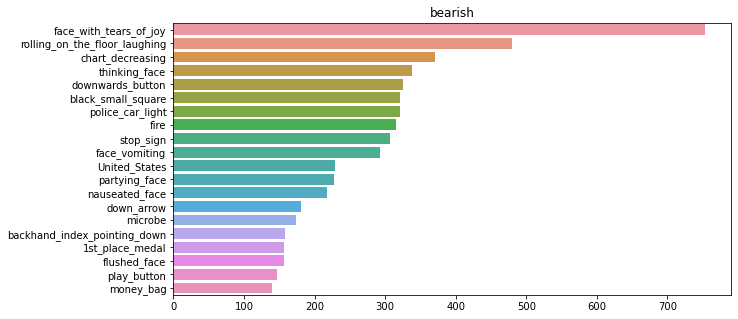

Top emojis for bullish 
 ['🔥', '📈', '💰', '💸', '🚀', '▪️', '😂', '▶', '🇺🇸', '⬆', '🔼', '➡️', '🛒', '🤑', '⬇', '✅', '🤣', '😎', '👀', '🤔']


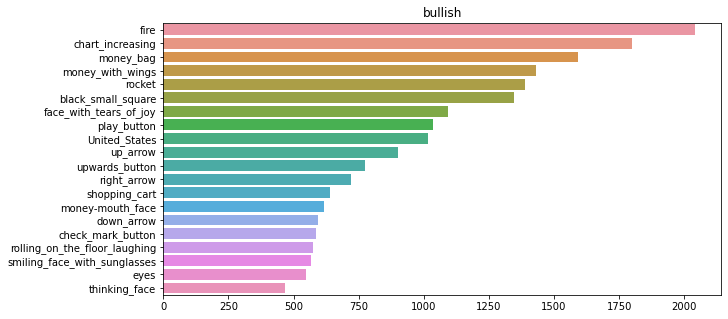

In [74]:
for t, emojis in target_emojis.items():
    plt.figure(figsize=(10, 5))
    bar_info = pd.Series(emojis).value_counts()[:20]
    print('=========='*10,  f'\nTop emojis for {t} \n', list(bar_info.index))
    bar_info.index = [emoji.demojize(i, delimiters=("", "")) for i in bar_info.index]
    sns.barplot(x=bar_info.values, y=bar_info.index)
        
    plt.title(f'{t}')
    plt.show()

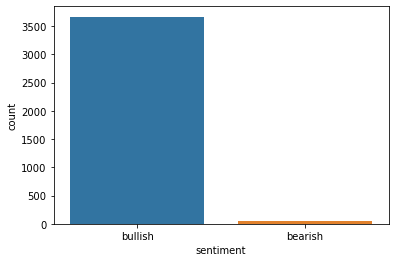

In [76]:
test_df = df.groupby(['date', 'stock'])[['bearish', 'bullish']].mean().reset_index()
test_df['sentiment'] = test_df[['bearish', 'bullish']].idxmax(axis = 1)
sns.countplot(data = test_df, x = 'sentiment')
plt.show()